In [249]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [250]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [251]:
import os

directorio_actual = os.getcwd()
print(directorio_actual)

c:\Users\taleb\Desktop\ULB\STIC-B545 - Traitement automatique de corpus\TP\tac\tps\tp3


In [252]:
data_path = "../../data/txt/"

1. Choisissez une décennie (1890–1899, 1900–1909, 1910–1919, etc.)

In [253]:
DECADE = '1960'
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [254]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [255]:
import re
import string
from nltk.corpus import stopwords

# Stopwords français
stop_fr = set(stopwords.words("french"))

clean_texts = []

for f in files:
    text = open(data_path + f, "r", encoding="utf-8").read().lower()

    # Enlever ponctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Enlever chiffres
    text = re.sub(r"\d+", " ", text)

    # Enlever lettres isolées (ex: "a", "b", "c")
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # Tokeniser grossièrement
    tokens = text.split()

    # Enlever stopwords
    tokens = [t for t in tokens if t not in stop_fr]

    # Reconstituer texte propre
    clean_texts.append(" ".join(tokens))
    texts=clean_texts


2. Effectuez un clustering des documents de cette décennie grâce au notebook s2_clustering.ipynb, en adaptant éventuellement le nombre de
clusters désirés


In [256]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer

# Charger stopwords français
stop_fr = set(stopwords.words("french"))

# Créer le stemmer
stemmer = FrenchStemmer()

def preprocessing(text, stem=True):
    # Mettre en minuscules
    text = text.lower()
    
    # Supprimer ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Supprimer chiffres
    text = re.sub(r'\d+', '', text)
    
    # Tokenisation
    tokens = word_tokenize(text, language='french')
    
    # Supprimer stopwords et lettres isolées
    tokens = [t for t in tokens if t not in stop_fr and len(t) > 1]
    
    # Appliquer le stemming si demandé
    if stem:
        tokens = [stemmer.stem(t) for t in tokens]
    
    return tokens


In [257]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    max_df=0.5,
    min_df=0.1,
    lowercase=True
)


In [258]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [259]:
N_CLUSTERS = 3

In [260]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [261]:
clusters = km_model.fit_predict(tfidf_vectors)
tfidf_vectors

<1000x2671 sparse matrix of type '<class 'numpy.float64'>'
	with 571537 stored elements in Compressed Sparse Row format>

In [262]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel       0.484757
ecrir        0.329537
bilingu      0.221708
represent    0.219468
ag           0.185398
               ...   
final        0.000000
financ       0.000000
financi      0.000000
firent       0.000000
■■           0.000000
Length: 2671, dtype: float64

In [263]:
clusters = km_model.fit_predict(tfidf_vectors)
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-27_01-00006.txt',
     'KB_JB838_1960-01-28_01-00011.txt',
     'KB_JB838_1960-01-28_01-00021.txt',
     'KB_JB838_1960-01-30_01-00007.txt',
     'KB_JB838_1960-01-31_01-00024.txt',
     'KB_JB838_1960-02-20_01-00006.txt',
     'KB_JB838_1960-02-26_01-00001.txt',
     'KB_JB838_1960-02-26_01-00011.txt',
     'KB_JB838_1960-03-06_01-00004.txt',
     'KB_JB838_1960-03-08_01-00008.txt',
     'KB_JB838_1960-03-09_01-00001.txt',
     'KB_JB838_1960-03-16_01-00007.txt',
     'KB_JB838_1960-03-20_01-00014.txt',
     'KB_JB838_1960-04-05_01-00004.txt',
     'KB_JB838_1960-04-06_01-00008.txt',
     'KB_JB838_1960-04-13_01-00002.txt',
     'KB_JB838_1960-04-16_01-00002.txt',
     'KB_JB838_1960-04-23_01-00005.txt',
     'KB_JB838_1960-05-03_01-00013.txt',
     'KB_JB838_1960-05-19_01-00004.txt',
     'KB_JB838_1960-05-29_01-00005.txt',
     'KB_JB838_1960-06-01_01-00011.txt',
     'KB_JB838_1960-07-05_01-00004.txt',
     'KB_JB838_1960-07-10_01-00001.txt',
     'KB_JB838_1

In [264]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())
# Axes du scatter plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

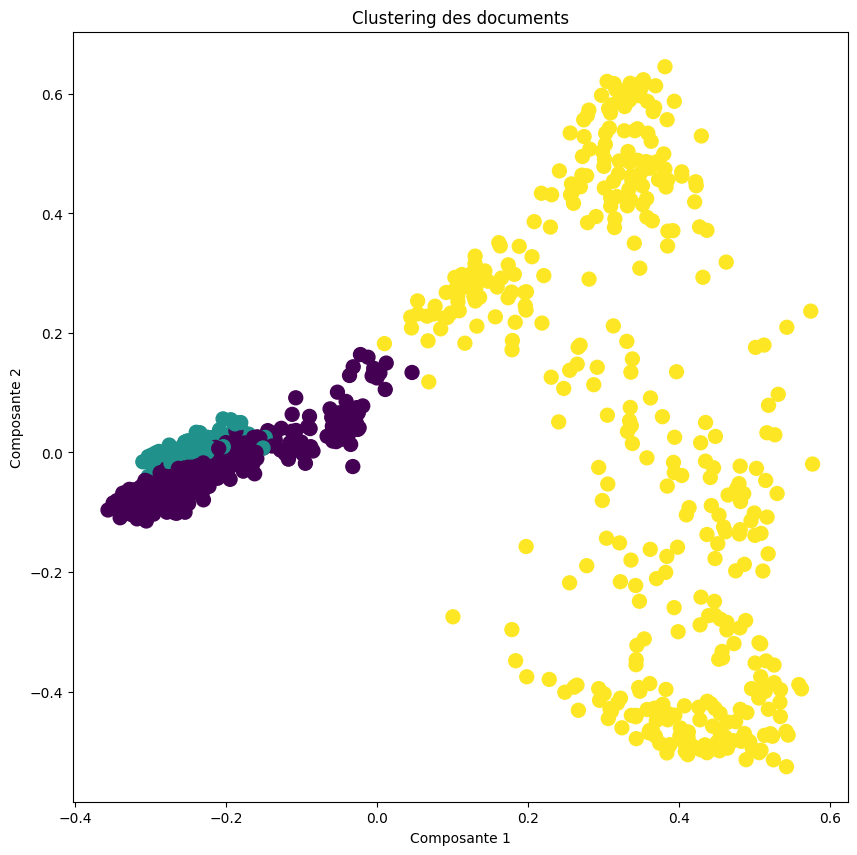

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=100, c=clusters)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Clustering des documents")
plt.savefig("clusters.png")  # le plot est sauvegardé
from PIL import Image
img = Image.open("clusters.png")
img.show()


4. Téléchargez sur l’UV le fichier zippé sents.txt, déjà segmenté en phrases,
et placez-le dans le dossier data

In [267]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [268]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [269]:
infile = f"../../data/sents.txt"
sentences = MySentences(infile)

5. Entraînez un modèle word2vec (word embeddings) sur ces phrases grâce
au notebook s3_word_embeddings.ipynb, en adaptant éventuellement les
paramètres window (taille de la fenêtre) et min_count (nombre minimum
d’occurrences d’un mot)

In [270]:
bigram_phrases = Phrases(sentences)

KeyboardInterrupt: 

In [ ]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [ ]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [ ]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=3, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=8, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 32min 10s
Wall time: 10min 43s


6. Vous pouvez entraîner plusieurs modèles afin de comparer leurs performances, en procédant par essais-erreurs pour choisir le meilleur modèle

In [ ]:
%%time
model2 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 21min 2s
Wall time: 6min 28s


In [ ]:
%%time
model3 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 19min 45s
Wall time: 6min 19s


In [ ]:
%%time
model4 = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=3, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=5, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 18min 54s
Wall time: 6min 12s


In [ ]:
outfile = f"../../data/newspapers.model"
model4.save(outfile)

7. Explorez le modèle retenu à l’aide des fonctions similarity et most_similar
(choisissez au moins trois exemples pour chaque fonction)

In [ ]:
model = Word2Vec.load("../../data/newspapers.model")

In [ ]:
list(model.wv.index_to_key[:10])

['.', ',', "'", 'de', '-', 'a', 'la', 'et', 'l', 'le']

In [ ]:
import string
from nltk.corpus import stopwords

# Charger le modèle
model = Word2Vec.load("../../data/newspapers.model")

# Stopwords français
stop_words = set(stopwords.words("french"))

#  Ajout de tes stopwords personnalisés
stop_words_sup = {
    "plus", "tel", "tout", "tous", "comme", "apres", "tres", "cette",
    "meme", "sans", "dont", "sous", "etc", "pres", "aussi", "entre",
    "avant", "toutes", "toute"
}

# Fusion des deux ensembles
stop_words = stop_words.union(stop_words_sup)

# Ponctuation
punct = set(string.punctuation)

vocab_clean = []

for w in model.wv.index_to_key:
    
    if all(c in punct for c in w):
        continue
    
    if w in stop_words:
        continue
    
    if any(c.isdigit() for c in w):
        continue
    
    if len(w) == 1:
        continue
    
    vocab_clean.append(w)

vocab_clean[:100]


['rue',
 'do',
 'fr',
 'dem',
 'bruxelles',
 'ch',
 'ag',
 'av',
 'rossel',
 'pl',
 'pr',
 'ans',
 'prix',
 'si',
 'maison',
 'ecr',
 'bien',
 'st',
 'place',
 'louer',
 'ec',
 'bon',
 'etait',
 'deux',
 'heures',
 'faire',
 'demande',
 'fait',
 'tr',
 'vendre',
 'brux',
 'an',
 'lo',
 'on_dem',
 'midi',
 '(r)',
 'ecrire',
 'ete',
 'grand',
 'ii',
 'etre',
 'el',
 'contre',
 'encore',
 'vend',
 'mois',
 'jour',
 'etat',
 'anvers',
 'nord',
 'dit',
 'app',
 'gr',
 'adr',
 'belgique',
 'fi',
 'ad',
 'peu',
 'or',
 'paris',
 'soir',
 'fille',
 'ville',
 'ci',
 'part',
 'saint',
 'ni',
 'non',
 'van',
 'suite',
 'agence_rossel',
 'eau',
 'bonne',
 'mod',
 'pays',
 'autres',
 'avenue',
 'autre',
 'france',
 'grande',
 'commerce',
 'vente',
 'porte',
 'chez',
 'salle',
 'jours',
 'gaz',
 'cuis',
 'mm',
 'libre',
 'marche',
 'chaussee',
 'PS',
 'francs',
 'centre',
 'temps',
 'chambre',
 'moins',
 'depuis',
 'pet',
 'belge',
 'quart',
 'jusqu',
 'guerre',
 'bureau',
 'lundi',
 'vers',
 're',


In [ ]:
model.wv.similarity("republique", "gaulle")

0.725477

In [ ]:
model.wv.similarity("paris", "urss")



0.50201

In [ ]:

model.wv.similarity("mur", "automobile")


0.2881397

In [ ]:
model.wv.similarity("anvers", "francs")

-0.03431607

Mostsimilar

In [ ]:
model.wv.most_similar("berlin", topn=10)

[('londres', 0.9683238863945007),
 ('moscou', 0.9514488577842712),
 ('rome', 0.9347703456878662),
 ('geneve', 0.9319227933883667),
 ('washington', 0.9118181467056274),
 ('budapest', 0.9115502834320068),
 ('vienne', 0.9069156646728516),
 ('berne', 0.901617705821991),
 ('teheran', 0.9005283117294312),
 ('tokio', 0.8980990648269653)]

In [ ]:
model.wv.most_similar("afrique", topn=10)

[('algerie', 0.8837360143661499),
 ('amerique', 0.8754496574401855),
 ('europe', 0.8748554587364197),
 ('asie', 0.8666808009147644),
 ('ukraine', 0.8550531268119812),
 ('indochine', 0.8514785170555115),
 ('europe_centrale', 0.8434401154518127),
 ('irak', 0.8417556881904602),
 ('abyssinie', 0.8411499857902527),
 ('indonesie', 0.8319275379180908)]

In [ ]:
model.wv.most_similar("republique", topn=10)

[('republique_francaise', 0.9101003408432007),
 ('cour_supreme', 0.8866487145423889),
 ('diete', 0.8810061812400818),
 ('famille_royale', 0.8576842546463013),
 ('municipalite', 0.8556260466575623),
 ('republique_argentine', 0.8555160164833069),
 ('delegation', 0.8554922342300415),
 ('delegation_americaine', 0.8543482422828674),
 ('douma', 0.8524157404899597),
 ('reichswehr', 0.8509874939918518)]

In [ ]:
model.wv.most_similar("pop", topn=10)

[('popul', 0.8328322768211365),
 ('eleg', 0.7797807455062866),
 ('fraric', 0.775781512260437),
 ('farn', 0.7748890519142151),
 ('jpet', 0.7736952304840088),
 ('tranqu', 0.767837643623352),
 ('euv', 0.7678042650222778),
 ('pct', 0.7657084465026855),
 ('bpn', 0.7621328234672546),
 ('aerv', 0.7603211998939514)]

In [ ]:
model.wv.most_similar(positive=['paris', 'belgique'], negative=['france'])

[('londres', 0.8580190539360046),
 ('new_york', 0.8454106450080872),
 ('leipzig', 0.8446351885795593),
 ('strasbourg', 0.8382307291030884),
 ('dusseldorf', 0.835833728313446),
 ('berne', 0.8212782144546509),
 ('geneve', 0.8174143433570862),
 ('beyrouth', 0.813953697681427),
 ('tunis', 0.8134617209434509),
 ('chicago', 0.8124983310699463)]